No handles with labels found to put in legend.


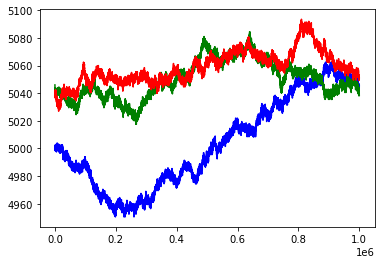

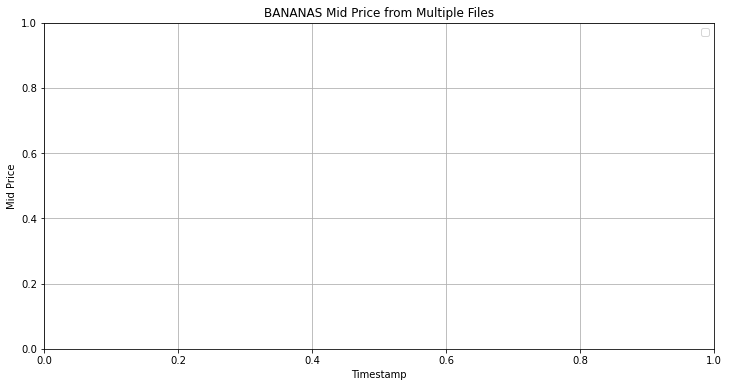

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = ['prices_round_1_day_-2.csv', 'prices_round_1_day_-1.csv', 'prices_round_1_day_0.csv']

def read_and_filter_data(file_path):
    df = pd.read_csv(file_path, sep=';')
    df = df[(df['timestamp'] >= 0) & (df['timestamp'] <= 999990) & (df['product'] == 'STARFRUIT')] 
    return df

# Create a color mapping
colors = {'day_-2': 'blue', 'day_-1': 'green', 'day_0': 'red'}  # Or any colors you prefer

# Extract day information for labeling
days = [path.split('_')[-2] for path in file_paths] 

# Plot each day separately
for file, day, color in zip(file_paths, days, colors.values()):
    df = read_and_filter_data(file)
    plt.plot(df['timestamp'], df['mid_price'], color=color, label=day)

plt.figure(figsize=(12, 6)) 
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('BANANAS Mid Price from Multiple Files')
plt.grid(True)
plt.legend()  # Add a legend
plt.show()